In [6]:
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import easygui

In [7]:
path = easygui.fileopenbox()

In [8]:
path

'E:\\4 Logistic Regression using Python\\xAPI-Edu-Data.csv'

In [9]:
df= pd.read_csv('E:\\4 Logistic Regression using Python\\xAPI-Edu-Data.csv')

In [18]:
df.tail()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L
479,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,Father,35,14,23,62,No,Bad,Above-7,L


### 1) Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?


<AxesSubplot:xlabel='Semester', ylabel='count'>

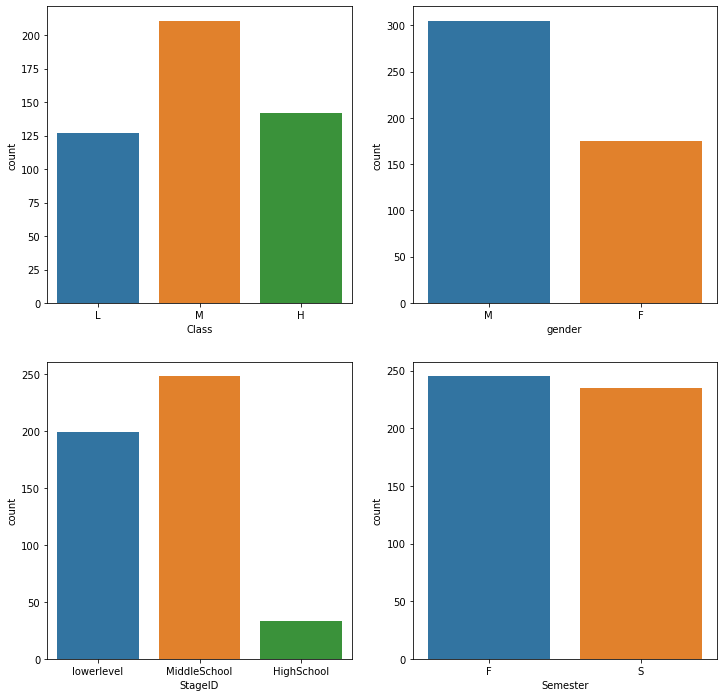

In [17]:
fig, axarr  = plt.subplots(2,2,figsize=(12,12))
sns.countplot(x='Class', data=df, ax=axarr[0,0], order=['L','M','H'])
sns.countplot(x='gender', data=df, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='StageID', data=df, ax=axarr[1,0])
sns.countplot(x='Semester', data=df, ax=axarr[1,1])

### In this countplots , we find that middleclass students are high comparitively than lower and higher class students respectively
### Then genderwise male students are higher than female students
### Middleschool StageID  is higher than highschool and lowerlevel
### First and second semester students approximately equal in numbers where first semester students slightly higher in numbers

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

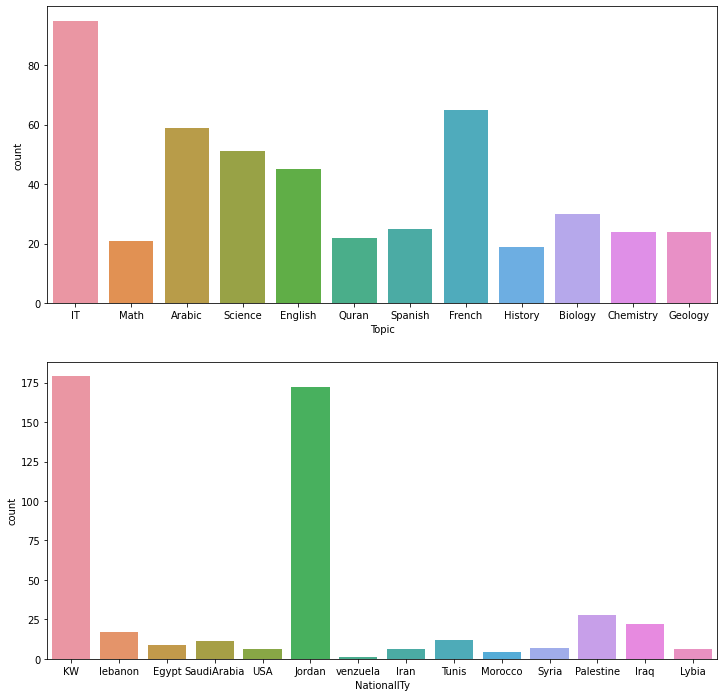

In [19]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(12,12))
sns.countplot(x='Topic', data=df, ax=axis1)
sns.countplot(x='NationalITy', data=df, ax=axis2)

### Mamimum  number of the students  are from IT Department
### Maximum number of the students nationality is KW and Jordan

### 2) Look at some categorical features in relation to each other, to see what insights could be possibly read?

<AxesSubplot:xlabel='gender', ylabel='count'>

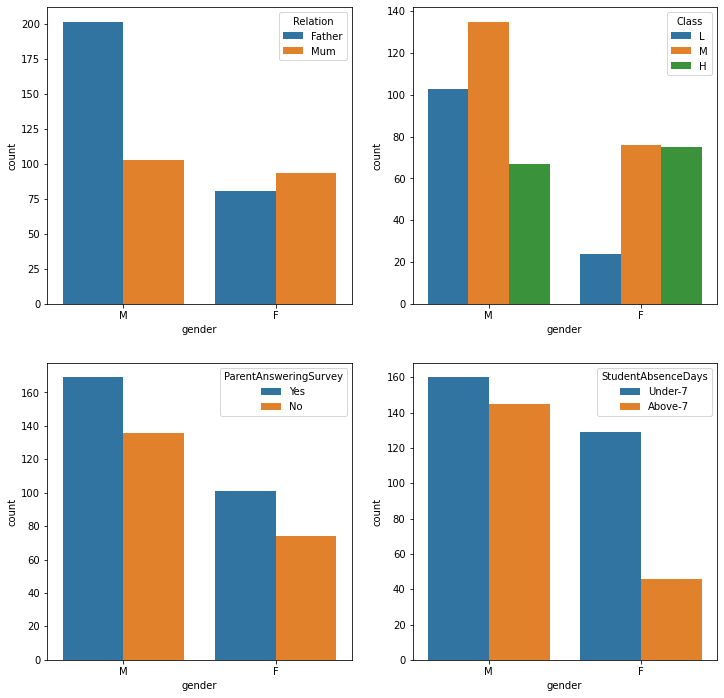

In [27]:
fig, axarr  = plt.subplots(2,2,figsize=(12,12))
sns.countplot(x='gender', hue='Relation', data=df, ax=axarr[0,0], order=['M','F'])
sns.countplot(x='gender', hue='Class', data=df, ax=axarr[0,1], order=['M','F'], hue_order=['L','M','H'])
sns.countplot(x='gender', hue='ParentAnsweringSurvey', data=df, ax=axarr[1,0], order=['M','F'])
sns.countplot(x='gender', hue='StudentAbsenceDays', data=df, ax=axarr[1,1], order=['M','F'])


### Fathers are more intrested in male students studies whereever Mum are more intrested in female students studies

### Genderwise male students are higher than female students in lower and middle level but in higher level class female students are higher than male students

### In surveying Male students parents says yes more than female students parents

### Female students attendence are more than male students


<AxesSubplot:xlabel='NationalITy', ylabel='count'>

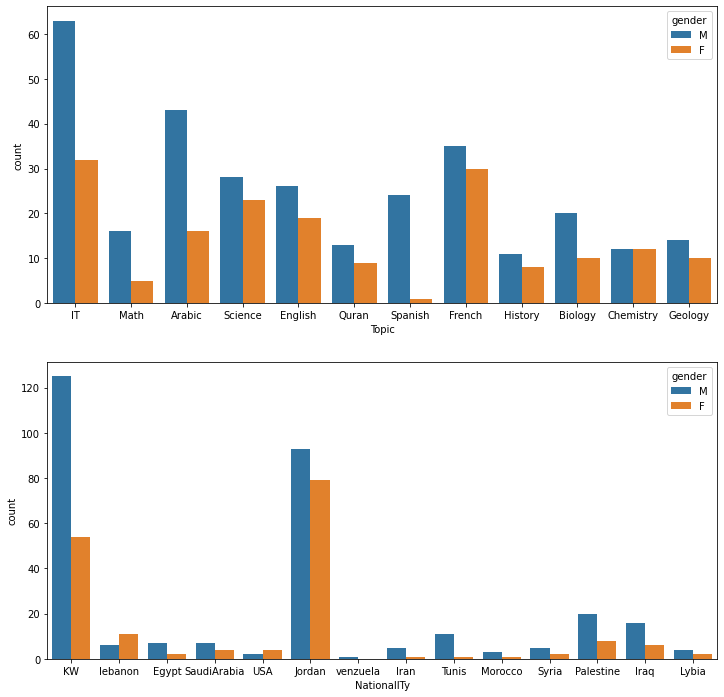

In [23]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(12,12))
sns.countplot(x='Topic', hue='gender', data=df, ax=axis1)
sns.countplot(x='NationalITy', hue='gender', data=df, ax=axis2)

### Every department males are more in numbers than female 
### Genderwise males dominating female in every country also 
### so we have a insight of gender disparity in these countries

### 3 Visualize categorical variables with numerical variables  and give conclusions?


<AxesSubplot:xlabel='Class', ylabel='Discussion'>

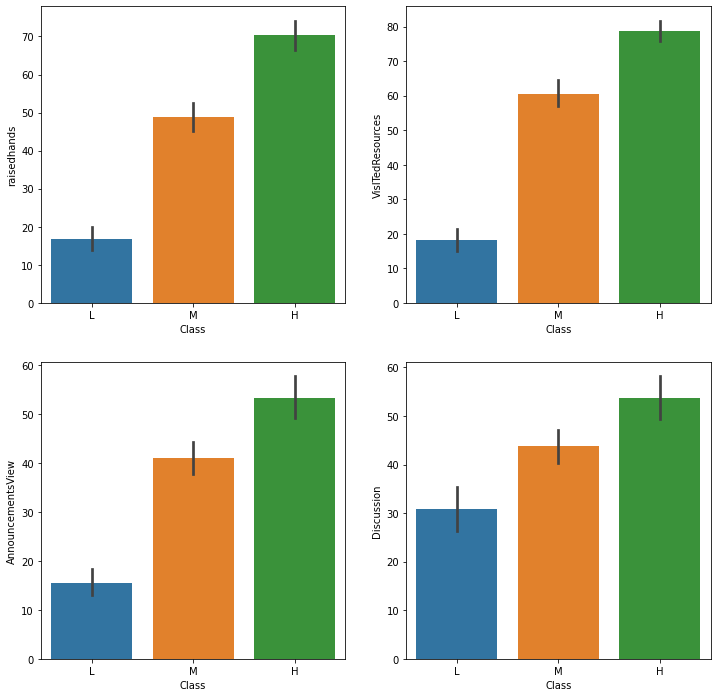

In [28]:
fig, axarr  = plt.subplots(2,2,figsize=(12,12))
sns.barplot(x='Class', y='raisedhands', data=df, order=['L','M','H'], ax=axarr[0,0])
sns.barplot(x='Class', y='VisITedResources', data=df, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='AnnouncementsView', data=df, order=['L','M','H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=df, order=['L','M','H'], ax=axarr[1,1])

<AxesSubplot:xlabel='Semester', ylabel='AnnouncementsView'>

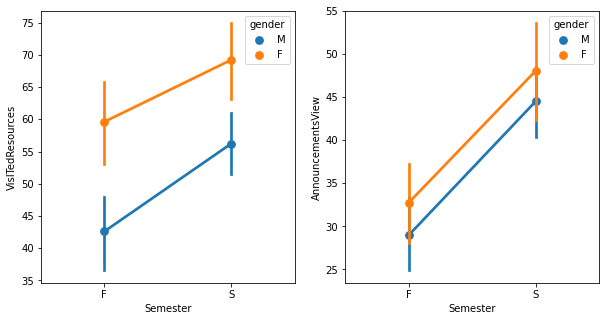

In [32]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='Semester', y='VisITedResources', hue='gender', data=df, ax=axis1)
sns.pointplot(x='Semester', y='AnnouncementsView', hue='gender', data=df, ax=axis2)

### In all the numerical metrics like raised hand, visting the resources  announcement views and discussion higher level class students participated more in numbers 
### In the case of both visiting resources and viewing announcements, students were more  in the intrested second semester as we seen in pointplot

### 4) From the above result, what are the factors that leads to get low grades of the students?

In [47]:
ave_raisedhands = sum(df['raisedhands'])/len(df['raisedhands'])
ave_VisITedResources = sum(df['VisITedResources'])/len(df['VisITedResources'])
ave_AnnouncementsView = sum(df['AnnouncementsView'])/len(df['AnnouncementsView'])
avg_student = df.loc[(df['raisedhands'] >= ave_raisedhands) & (df['VisITedResources']>=ave_VisITedResources) & (df['AnnouncementsView']>=ave_AnnouncementsView)  & (df['Class'] == 'L')]

In [48]:
avg_student

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,numeric_class
444,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,75,72,64,39,Yes,Good,Above-7,L,1
445,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,72,76,66,40,Yes,Good,Above-7,L,1


In [45]:
df['numeric_class'] = [1 if df.loc[i,'Class'] == 'L' else 2 if df.loc[i,'Class'] == 'M' else 3 for i in range(len(df))]

In [46]:
df['numeric_class']


0      2
1      2
2      1
3      1
4      2
      ..
475    1
476    2
477    2
478    1
479    1
Name: numeric_class, Length: 480, dtype: int64

Jordan average: 2.0930232558139537


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'KW'),
  Text(1, 0, 'lebanon'),
  Text(2, 0, 'Egypt'),
  Text(3, 0, 'SaudiArabia'),
  Text(4, 0, 'USA'),
  Text(5, 0, 'Jordan'),
  Text(6, 0, 'venzuela'),
  Text(7, 0, 'Iran'),
  Text(8, 0, 'Tunis'),
  Text(9, 0, 'Morocco'),
  Text(10, 0, 'Syria'),
  Text(11, 0, 'Palestine'),
  Text(12, 0, 'Iraq'),
  Text(13, 0, 'Lybia')])

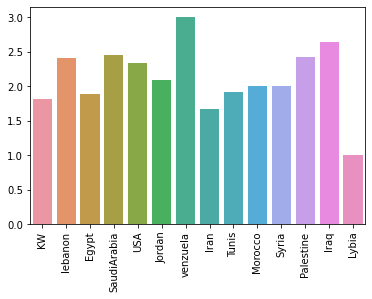

In [43]:
nation = df.NationalITy.unique()
nation_grades_ave = [sum(df[df.NationalITy == i].numeric_class)/float(len(df[df.NationalITy == i])) for i in nation]
ax = sns.barplot(x=nation, y=nation_grades_ave)
jordan_ave = sum(df[df.NationalITy == 'Jordan'].numeric_class)/float(len(df[df.NationalITy == 'Jordan']))
print('Jordan average: '+str(jordan_ave))
plt.xticks(rotation=90)


Text(0.5, 1.0, 'Relation with father or mother affects success of students')

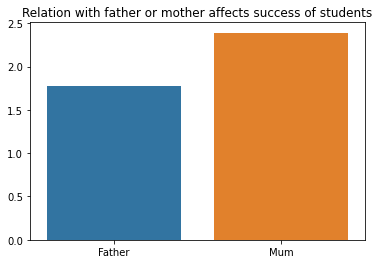

In [52]:
relation = df.Relation.unique()
relation_grade_ave = [sum(df[df.Relation == i].numeric_class)/float(len(df[df.Relation == i])) for i in relation]
ax = sns.barplot(x=relation, y=relation_grade_ave)
plt.title('Relation with father or mother affects success of students')

Text(0.5, 1.0, 'Absence affects on success of students')

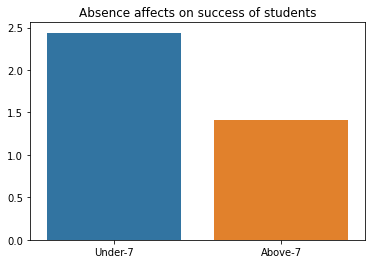

In [54]:
absence_day = df.StudentAbsenceDays.unique()
absense_day_ave = [sum(df[df.StudentAbsenceDays == i].numeric_class)/float(len(df[df.StudentAbsenceDays == i])) for i in absence_day]
ax = sns.barplot(x=absence_day, y=absense_day_ave)
plt.title('Absence affects on success of students')

Text(0.5, 1.0, 'Discussion group participation')

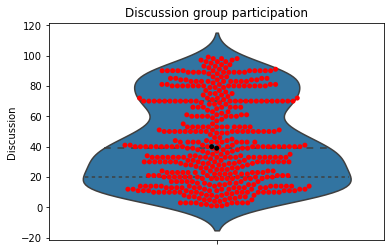

In [57]:
discussion = df.Discussion
discussion_ave = sum(discussion)/len(discussion)
ax = sns.violinplot(y=discussion,split=True,inner='quart')
ax = sns.swarmplot(y=discussion,color='red')
ax = sns.swarmplot(y = avg_student.Discussion, color='black')
plt.title('Discussion group participation')

### These two students are under the average of discussion . so,they are not actively  participating in discussion groups  so that can be impact on low grades
### Their absence days are above seven which also impacted in low grades


### 5) Build classification model and present it's classification report?


In [58]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,numeric_class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,2
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,2
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,2


In [59]:
df1 = df.drop('Class',axis = 1)
df2 = pd.get_dummies(df1, drop_first=True)

In [61]:
df2.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,numeric_class,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,2,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,2,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
2,10,7,0,30,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,30,25,5,35,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,40,50,12,50,2,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [62]:
Features = df2.drop(['numeric_class'],axis = 1)
Target = df2['numeric_class']

In [63]:
Target

0      2
1      2
2      1
3      1
4      2
      ..
475    1
476    2
477    2
478    1
479    1
Name: numeric_class, Length: 480, dtype: int64

In [64]:
Features

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,1
2,10,7,0,30,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
476,50,77,14,28,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
477,55,74,25,29,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
478,30,17,14,57,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Features)


StandardScaler()

In [66]:
X = scaler.fit_transform(Features)

In [67]:
X

array([[-1.03342931, -1.17407456, -1.35116659, ...,  0.8819171 ,
         0.80239368,  0.81295735],
       [-0.87081258, -1.05302945, -1.31354928, ...,  0.8819171 ,
         0.80239368,  0.81295735],
       [-1.19604604, -1.44642607, -1.4264012 , ..., -1.13389342,
        -1.24627103, -1.23007683],
       ...,
       [ 0.26750452,  0.58107959, -0.48596856, ..., -1.13389342,
        -1.24627103,  0.81295735],
       [-0.54557912, -1.14381328, -0.89975892, ..., -1.13389342,
        -1.24627103, -1.23007683],
       [-0.3829624 , -1.23459712, -0.56120318, ..., -1.13389342,
        -1.24627103, -1.23007683]])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, Target, test_size=0.3, random_state=42)

In [81]:
Log_Model = LogisticRegression()
Log_Model.fit(X_train,y_train)

LogisticRegression()

In [82]:
Prediction = Log_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [83]:
Prediction

array([1, 1, 3, 2, 2, 2, 1, 1, 2, 2, 2, 3, 3, 1, 3, 2, 1, 2, 1, 2, 3, 3,
       1, 2, 1, 1, 3, 2, 1, 2, 3, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       3, 1, 3, 2, 3, 2, 3, 2, 1, 2, 2, 2, 1, 3, 2, 1, 2, 1, 1, 3, 2, 2,
       1, 2, 1, 3, 2, 3, 1, 2, 2, 2, 2, 1, 1, 3, 3, 2, 2, 3, 2, 2, 2, 1,
       1, 2, 3, 2, 2, 2, 1, 3, 1, 3, 2, 2, 2, 1, 1, 3, 2, 3, 3, 2, 2, 1,
       2, 2, 2, 3, 2, 1, 3, 2, 2, 1, 1, 1, 3, 3, 1, 2, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1], dtype=int64)

In [84]:
Score

0.75

In [80]:
print(Report)

              precision    recall  f1-score   support

           1       0.80      0.82      0.81        45
           2       0.74      0.74      0.74        68
           3       0.70      0.68      0.69        31

    accuracy                           0.75       144
   macro avg       0.75      0.74      0.75       144
weighted avg       0.75      0.75      0.75       144

